<a href="https://colab.research.google.com/github/abdullahA7med/resueme/blob/main/0_scratch_time_searies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Time Series from scratch ⏳📊📈

In [54]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/Coffe_sales.csv')

df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


### inspecting my data.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [56]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


### wrangling date

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB


In [59]:
df_time = df.set_index('Date')

In [60]:
df_time.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Time
Date,,,,,,,,,,
2024-03-01,10,card,38.7,Latte,Morning,Fri,Mar,5,3,10:15:50.520000
2024-03-01,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:19:22.539000
2024-03-01,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:20:18.089000
2024-03-01,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,13:46:33.006000
2024-03-01,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,13:48:14.626000


### Exploratory Data analysis (EDA).

<Axes: xlabel='Date'>

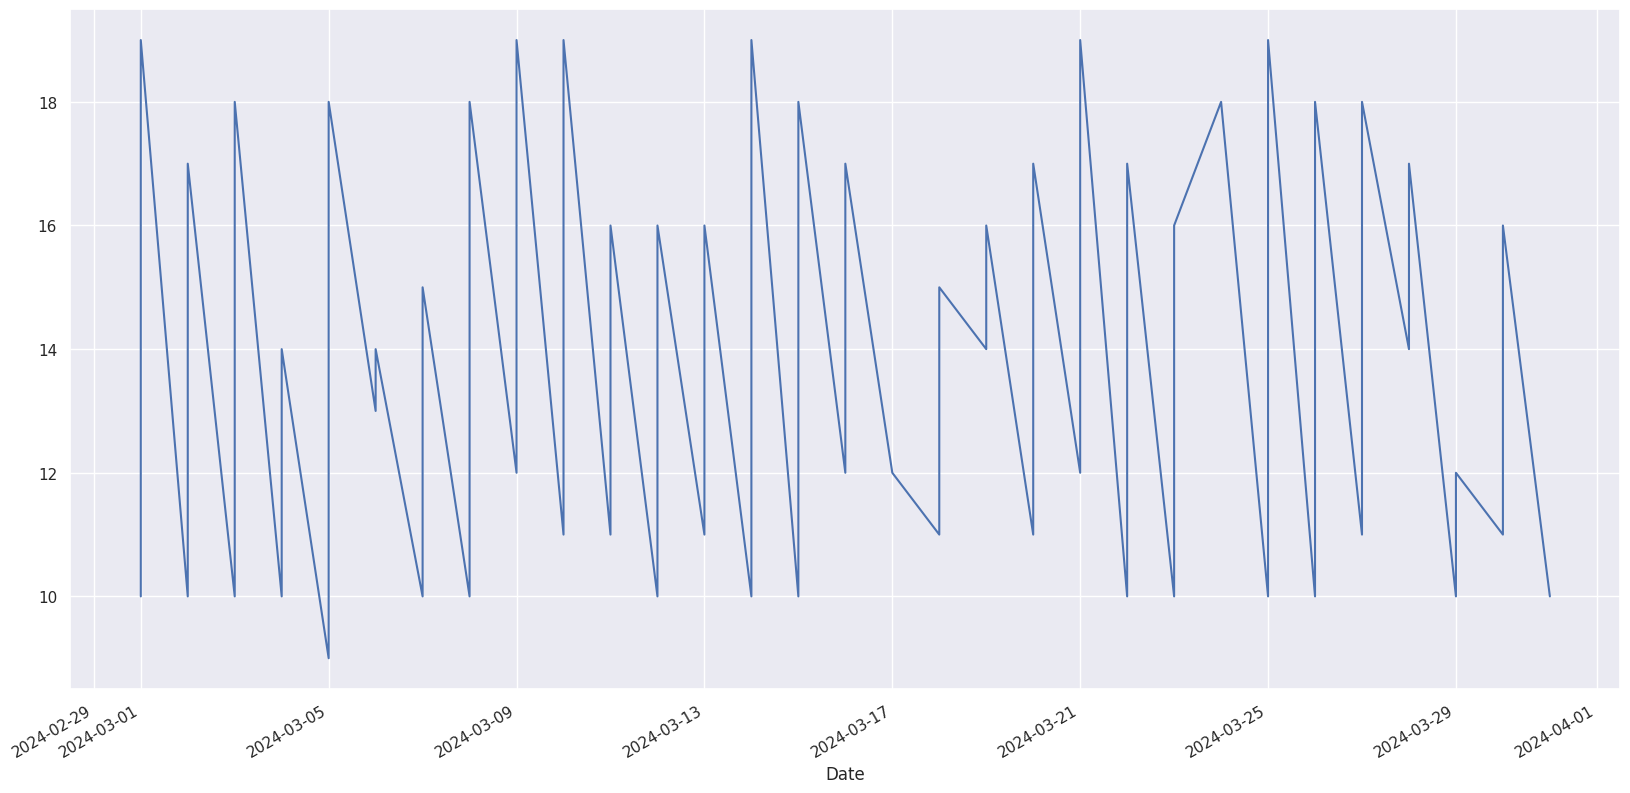

In [61]:
df_time['2024-02':'2024-03']['hour_of_day'].plot(figsize=(20,10))

<Axes: ylabel='Frequency'>

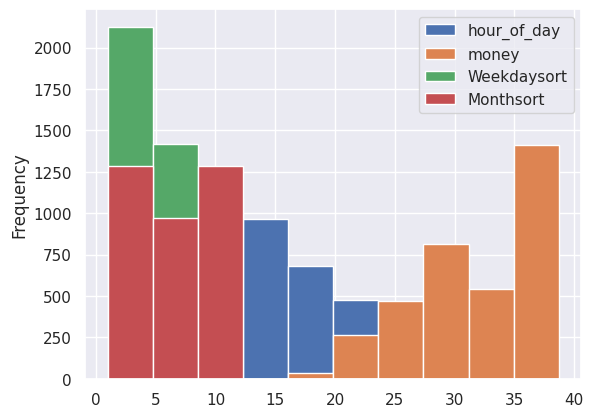

In [62]:
df_time.plot(kind='hist')

### converting form seassonality to Trend time series.

In [63]:
sam = df_time.loc['2024-03-01':'2024-03-3']

<Axes: xlabel='Date'>

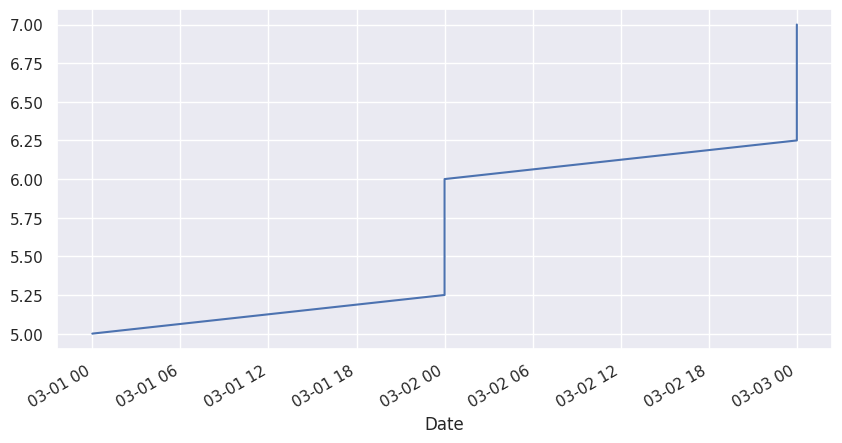

In [64]:
sam['Weekdaysort'].rolling(4).mean().plot(figsize=(10,5))

### 2] python datetime module

**python have module to deal with time**

some time when you try to convert your date column to be datetime , **not work**, becouse the way is more comblex.

- `pd.to_datetime(df['Date'])` , you can use the format param.

- **or use `datetime` module.**

##### it have some submodule.
- date        -> define just date & his process
- time        -> define just date & his process
- datetime    -> define  date and time & his process
- timedelta   -> do some statistic and math operation on it
- tzinfo      -> get time zone info.



In [65]:
import datetime as dt

dfg = pd.read_csv('/content/drive/MyDrive/DataSet/multiTimeline.csv')

let's see some function and module of datetime.

In [66]:
dt.datetime.now()

datetime.datetime(2025, 9, 9, 19, 7, 7, 506593)

In [67]:
dt.datetime.now()   # get time now

datetime.datetime(2025, 9, 9, 19, 7, 7, 526381)

In [68]:
# define date object , can do process on it

dt.date(2019, 5, 6).day    # get the day name

6

In [69]:
dt.date(2019, 5, 6).month

5

In [70]:
dt.date(2019, 5, 6).year

2019

In [71]:

dt.time(10 ,30, 12).hour

10

In [72]:
dt.time(10 ,30, 12).minute

30

now we have this date -> `2025,3,5` , what if need increse the date by 2 day. **here i use `timedelta`**

In [73]:
dt.date(2025,3,5) + dt.timedelta(2)

datetime.date(2025, 3, 7)

In [74]:
dt.date(2025,3,5) + dt.timedelta(days=2)

datetime.date(2025, 3, 7)

some time you got your date as a string, `can do it by pandas & datetime`

**convert a string into datetime**

- strtime()  => convert str to time

- strftime() => convert time to string


In [75]:
dt.datetime.strptime('2024-02-05' , '%Y-%m-%d')

datetime.datetime(2024, 2, 5, 0, 0)

In [76]:
dt.datetime.strftime(dt.date(2017,3,5), '%Y-%m-%d')

'2017-03-05'

### 3] pandas time series function

In [77]:
#  to defien data into pandas

pd.Timestamp('2015 ,5 ,13')

Timestamp('2015-05-13 00:00:00')

In [78]:
# also can use with it datetime module


pd.Timestamp(dt.datetime(2025,6,23))

Timestamp('2025-06-23 00:00:00')

In [79]:
# also can add your date as a text.

pd.Timestamp('3rd of may 2019')

Timestamp('2019-05-03 00:00:00')

In [80]:
pd.Timestamp('3rd of Feb 2019')

Timestamp('2019-02-03 00:00:00')

In [81]:
# can make an object from Timestamp | To access function

st = pd.Timestamp('3rd of Feb 2019')

In [82]:
st.day

3

In [83]:
st.day_name()

'Sunday'

In [84]:
st.year

2019

the most power attributes, which start by -> is

In [85]:
st.is_month_end

False

In [86]:
st.is_year_start

False

In [87]:
st.is_leap_year

False

In [88]:
# get quarter
st.quarter

1

### 4] date manipulation.

##### Date parsing:  -> there are 3 way.

**indexing a Dateset with a DatetimeIndex Object**

Timestamp can serve as an index. List of Timestamp are automaticaally coerced to DatetimeIndex object

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB


### Date parsing.

In [90]:
dates = [pd.Timestamp('2025/02/03'), pd.Timestamp('2012/3/25'), pd.Timestamp('2014/4/24')]


ts = pd.Series(np.random.randint(3) , dates)

ts.head()

,0
2025-02-03,0
2012-03-25,0
2014-04-24,0


In [95]:
# on real data.

temps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/timeseries_materials/datasets/temps.csv')

temps.head()


,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [96]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


as we see our date type was object we shoud make convert.

#### first way:

In [103]:
temps['datetime'] = pd.to_datetime(temps['datetime'])


In [104]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   LA        35062 non-null  float64       
 2   NY        35064 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 821.9 KB


In [107]:
temps.set_index('datetime', inplace=True)

what is the penefit to convert his type and make it index

- **you can creat a new column have, the day name.**

In [109]:
temps.index.day_name()


temps['Day_name'] = temps.index.day_name()

temps.head()

,LA,NY,Day_name
datetime,,,
2013-01-01 00:00:00,11.7,-1.1,Tuesday
2013-01-01 01:00:00,10.7,-1.7,Tuesday
2013-01-01 02:00:00,9.9,-2.0,Tuesday
2013-01-01 03:00:00,9.3,-2.1,Tuesday
2013-01-01 04:00:00,8.8,-2.3,Tuesday


that good for groupby & pivote table

In [111]:
temps.groupby('Day_name').mean()

,LA,NY
Day_name,,
Friday,17.595116,11.983951
Monday,17.535631,12.078546
Saturday,17.526376,11.633373
Sunday,17.590605,12.155669
Thursday,17.478010,12.163417
Tuesday,17.244737,12.243640
Wednesday,17.432396,12.219757


can do same for -> week, day, quarter

### 2] sec way

**`pd.read_csv()` method**

**have some values:**

- True   -> convert any column have date

- [col_name] => you type name of the column


In [117]:
tems2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/timeseries_materials/datasets/temps.csv', parse_dates=['datetime'])


tems2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/timeseries_materials/datasets/temps.csv',
                    parse_dates=['datetime'],
                    index_col='datetime')

In [118]:
tems2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [119]:
tems2.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


### 3rd] way

**pd.to_datetime()**

In [121]:
tems3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/timeseries_materials/datasets/temps.csv')

In [122]:
tems3.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [123]:
tems3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


In [124]:
pd.to_datetime(tems3['datetime'])

,datetime
0,2013-01-01 00:00:00
1,2013-01-01 01:00:00
2,2013-01-01 02:00:00
3,2013-01-01 03:00:00
4,2013-01-01 04:00:00
...,...
35059,2016-12-31 19:00:00
35060,2016-12-31 20:00:00
35061,2016-12-31 21:00:00
35062,2016-12-31 22:00:00


In [125]:
tems3['datetime'] = pd.to_datetime(tems3['datetime'])